In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

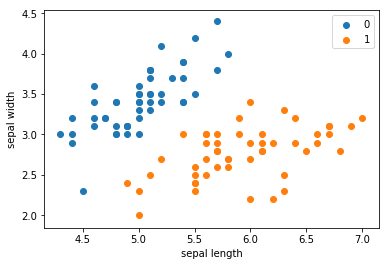

In [9]:
#对于线性可分

# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

# 行列数据标注
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()
df.head(5)

# 数据可视化展示
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

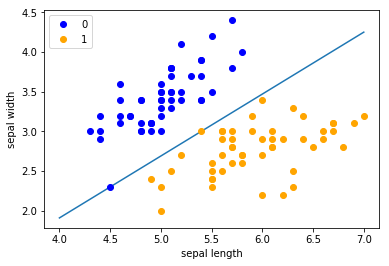

In [10]:
# 选取特征和标签
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
y = np.array([1 if i == 1 else -1 for i in y]) # 将label中的0标签替换为-1

# 数据线性可分，二分类数据
# 此处为一元一次线性方程
class Model:
    # 类创建对象时自动执行，进行初始化操作
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)  # 初始化权重
        self.b = 0  # 初始化截距项
        self.l_rate = 0.1  # 学习步长
        # self.data = data

    # 定义符号函数
    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X) # 更新权重
                    self.b = self.b + self.l_rate * y # 更新步长
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'

    def score(self):
        pass

perceptron = Model()  # 类的实例化，创建一个对象
perceptron.fit(X, y)  # 调用类的fit方法

# 可视化超平面
x_points = np.linspace(4, 7, 10)  # linspace返回固定间隔的数据
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1] # 误差分类点到超平面的距离
plt.plot(x_points, y_)

# 可视化展示
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()


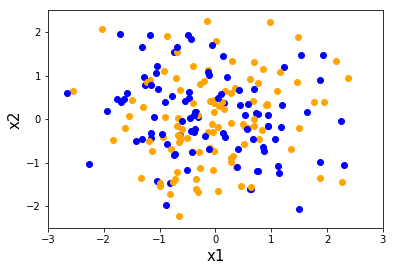

In [40]:
#对于线性不可分

#生成样本数据
np.random.seed(0) 
X= np.random.randn(100*2,2)
y = np.sign(np.random.randn(100*2,1)) 

#画样本散点图
for i in range(len(X)):
    if y[i] == 1:
        plt.plot(X[i][0],X[i][1],'bo',color='blue')
    else:
        plt.plot(X[i][0],X[i][1],'bo', color='orange')

               
#限制图的显示范围       
lim_x = plt.xlim(-3,3)  
lim_y = plt.ylim(-2.5,2.5)
#给x,y轴加标签
plt.xlabel('x1',size=15)
plt.ylabel('x2',size=15)
plt.show()


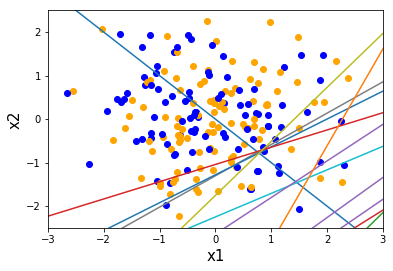

In [42]:
#重绘散点图
for i in range(len(X)):   #x的长度表示样本的个数
    if y[i] ==1:
        plt.plot(X[i][0],X[i][1],'bo',color='blue')
    else:
        plt.plot(X[i][0],X[i][1],'bo',color='orange')

class Model2():
    # 类创建对象时自动执行，进行初始化操作
    def __init__(self,X,y):
        self.w = np.ones(2, dtype=np.float32)# 初始化权重
        self.b = 0  # 初始化截距项
        self.l_rate = 0.1  # 学习步长
        self.training_num = 500
        # self.data = data  
    def lp(self):
        #开始训练
        for step in range(self.training_num+1) :
           #初始化梯度值
            grad_x = np.array([0,0])
            grad_b = 0
              #每训练10次更新一次分界线
            if step%10 == 0 : 
                #为了画分界线，必须生成两个参考点，因为两点确定一条直线
                ref_x = [-10,10]
                ref_y = [0,0]
                for i in range(len(ref_x)):
                    ref_y[i] = -(self.w[0]*ref_x[i]+self.b)/self.w[1]
                pp = plt.plot(ref_x,ref_y)
    
            #遍历训练样本集寻找错分样本 
            for j in range(len(X)):
            #判断是否为错分样本
                if y[j] != np.sign(np.dot(self.w,X[j])+self.b):
                    #更新反向梯度值
                    grad_x = grad_x+y[j]*X[j]
                    grad_b = grad_b+y[j]
            
            #利用梯度下降更新参数
            self.w = self.w+self.l_rate*grad_x
            self.b = self.b+self.l_rate*grad_b         
         
        lim_x = plt.xlim(-3,3)  
        lim_y = plt.ylim(-2.5,2.5)
       
        x_lab = plt.xlabel('x1',size=15)
        y_lab = plt.ylabel('x2',size=15)
        plt.show()
lp=Model2(X,y)
lp.lp()